In [1]:
import pandas
from matplotlib import pyplot as plt

In [2]:
df = pandas.read_csv('pace_instances.csv', sep=',')
reds = ["all reds", "force p3", "force star", "twin simple", "twin complex", "icx", "heavy edge (b)", "heavy edge (s)", "heavy non-edge", "forced single merge"]
df['gap'] = df.upper - df.low_star
ds = df[df.solved==1]
df.head()

,num,n,m,solved,opt,upper,dels,adds,low_star,low_p3,...,forbs heavy non-edge,time heavy non-edge,spend heavy non-edge,lower after heavy non-edge,after forced single merge,forbs forced single merge,time forced single merge,spend forced single merge,lower after forced single merge,gap
0,1,10,11,1,3,3,3,0,3,3,...,0,0,0,3,0,0,0,3,3,0
1,2,20,68,1,7,7,7,0,7,7,...,73,0,0,7,0,0,2,7,7,0
2,3,20,73,1,42,42,35,7,40,35,...,29,0,0,40,20,25,29,0,40,2
3,4,20,75,1,32,32,21,11,32,32,...,21,0,0,32,0,0,12,32,32,0
4,5,20,97,1,46,46,39,7,41,44,...,22,0,0,41,19,20,38,3,43,5


In [4]:
df.solved.sum()

173

In [5]:
(df.upper - df.opt)[df.solved].sum()

0

In [7]:
len(df[df['after all reds']==0])

151

In [29]:
print(len(df[df['time']<1000])) # after 1s
print(len(df[df['time']<60*1000])) # after 1min
print(len(df[df['time']<10*60*1000])) # after 10min

98
160
171


In [18]:
df[df.solved==1].opt.describe()
df[df.solved==1].gap.describe()
df.gap.describe()
df['gap2'] = df.upper - df.low_p3
df.gap.describe()

count    200.000000
mean      14.630000
std       41.601762
min        0.000000
25%        0.000000
50%        1.000000
75%        9.250000
max      403.000000
Name: gap, dtype: float64

In [12]:
1800 * 0.02

36.0

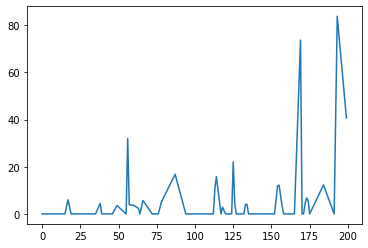

,num,n,m,solved,opt,upper,dels,adds,low_star,low_p3,...,spend%upper heavy edge (b),after% heavy edge (s),gap change heavy edge (s),spend%upper heavy edge (s),after% heavy non-edge,gap change heavy non-edge,spend%upper heavy non-edge,after% forced single merge,gap change forced single merge,spend%upper forced single merge
0,1,10,11,1,3,3,3,0,3,3,...,0.000000,100.000000,0,0.000000,100.0,0,0.0,0.000000,0,100.000000
1,2,20,68,1,7,7,7,0,7,7,...,0.000000,100.000000,0,0.000000,100.0,0,0.0,0.000000,0,100.000000
3,4,20,75,1,32,32,21,11,32,32,...,0.000000,100.000000,0,0.000000,100.0,0,0.0,0.000000,0,100.000000
5,6,20,113,1,9,9,8,1,9,9,...,0.000000,100.000000,0,0.000000,100.0,0,0.0,0.000000,0,100.000000
7,8,30,172,1,81,81,70,11,81,79,...,0.000000,100.000000,0,0.000000,100.0,0,0.0,0.000000,0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,313,7570,1,908,908,316,592,908,908,...,0.000000,100.000000,0,0.000000,100.0,0,0.0,0.000000,0,100.000000
184,185,347,1456,1,203,203,130,73,203,200,...,2.955665,96.648045,0,0.985222,100.0,0,0.0,12.290503,0,88.669951
191,192,400,32613,1,7249,7249,6702,547,7249,7242,...,0.000000,100.000000,0,0.000000,100.0,0,0.0,0.000000,0,100.000000
193,194,400,70027,1,8908,8908,1528,7380,8908,8907,...,0.000000,100.000000,0,0.000000,100.0,0,0.0,83.750000,1,8.172429


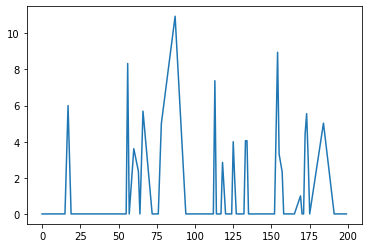

In [23]:
df[df.gap==0]['after% forced single merge'].plot()
plt.show()
df[df.gap==0]['after% force star'].plot()
df[df.gap==0]['after% force star'].describe()
df[df.gap==0]['after% forced single merge'].describe()
df[df.gap==0]

In [18]:
df['after% all reds'].describe()

count    200.000000
mean      18.325012
std       35.948373
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      100.000000
Name: after% all reds, dtype: float64

In [27]:
df['time forced single merge'].describe()

count    2.000000e+02
mean     5.074665e+05
std      1.062118e+06
min      0.000000e+00
25%      3.903750e+03
50%      3.071550e+04
75%      2.501318e+05
max      5.730277e+06
Name: time forced single merge, dtype: float64

In [29]:
200 - len(df[df.gap==0])

121

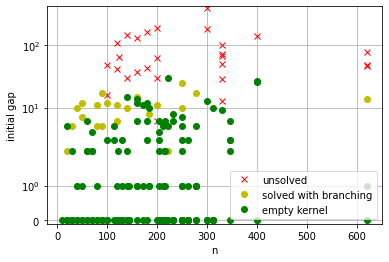

In [6]:
df[df.solved==0].plot(x='n', y='gap', style='rx', label='unsolved')

ds[ds['after all reds']>0].plot(x='n', y='gap', style='yo', ax=plt.gca(), label='solved with branching')
ds[ds['after all reds']==0].plot(x='n', y='gap', style='go', ax=plt.gca(), label='empty kernel')
plt.yscale('symlog')
plt.ylim(bottom=-0.1)
plt.grid()
plt.ylabel('initial gap')
plt.savefig('plots/pace-gap.pdf', bbox_inches='tight')

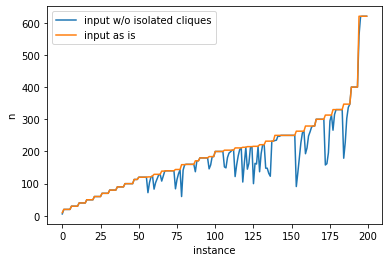

In [4]:
df['n-clean'].plot(label='input w/o isolated cliques')
df['n'].plot(label='input as is')
plt.ylabel('n')
plt.xlabel('instance')
plt.legend()
plt.savefig('plots/pace-size.pdf', bbox_inches='tight')

In [6]:
for r in reds:
    df[f'after% {r}'] = 100 * df[f'after {r}'] / df['n-clean']
    df[f'gap change {r}'] = (df.upper - df[f'lower after {r}']) - df.gap
    df[f'spend%upper {r}'] = (df[f'spend {r}'] / df.upper * 100)

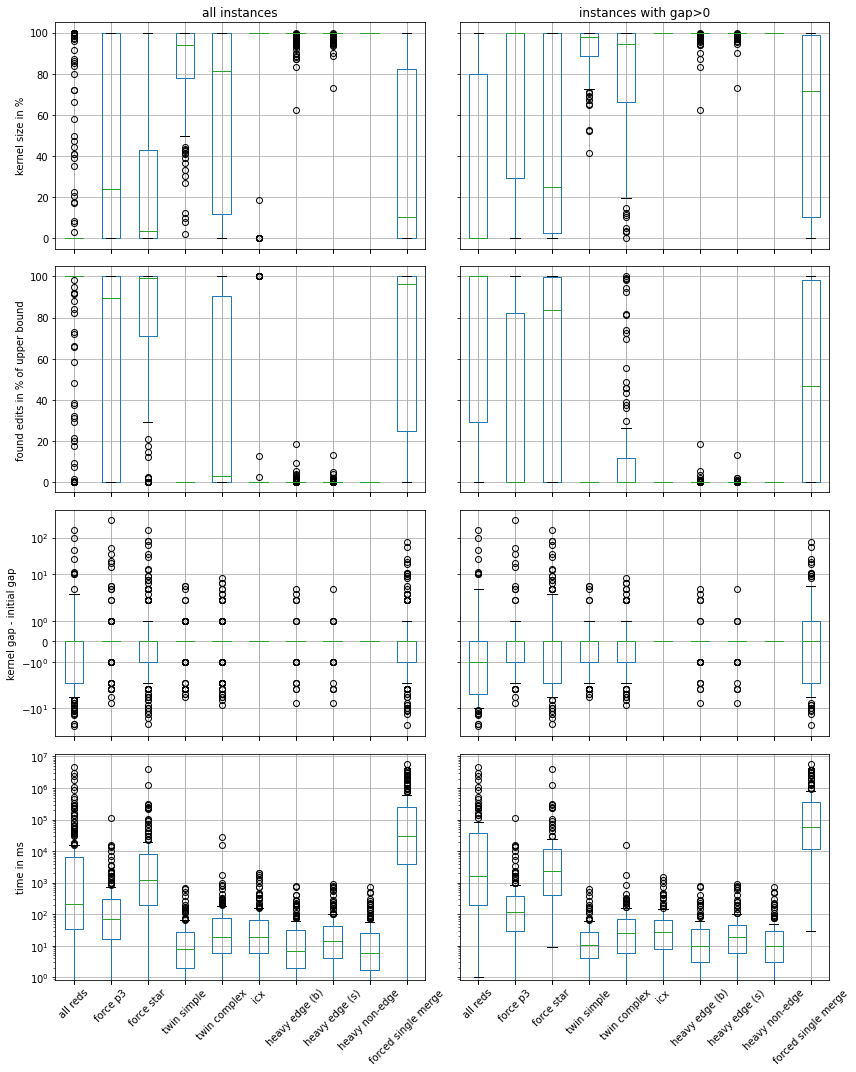

In [22]:
fig, (axn, axe, axc, axt) = plt.subplots(4,2, sharey='row', sharex='col', figsize=(12,15), tight_layout=True)

def make_plot(axs, col, ylabel):
    cols = [f'{col} {r}' for r in reds]
    df.boxplot(cols, rot=45, ax=axs[0])
    df[df.gap>0].boxplot(cols, rot=45, ax=axs[1])
    #axs[0].set_xticklabels(reds)
    #axs[1].set_xticklabels(reds)
    axs[0].set_ylabel(ylabel)

make_plot(axn, 'after%', 'kernel size in %')
make_plot(axe, 'spend%upper', 'found edits in % of upper bound')
make_plot(axc, 'gap change', 'kernel gap - initial gap')
make_plot(axt, 'time', 'time in ms')

axn[0].set_title('all instances')
axn[1].set_title('instances with gap>0')
axc[0].set_yscale('symlog')
axt[0].semilogy()
axt[0].set_xticklabels(reds)
axt[1].set_xticklabels(reds)

plt.savefig('plots/pace-kernel-combined.pdf',bbox_inches='tight')

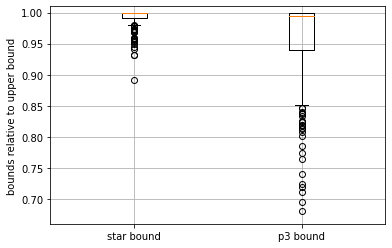

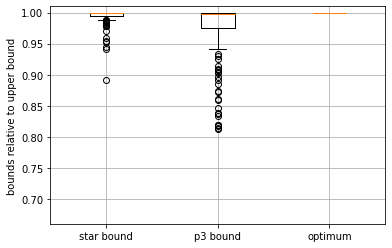

In [51]:
solved = df.solved==True
low_rel = df.low_star/df.upper
opt_rel = df.opt/df.upper
p3_rel = df.low_p3/df.upper

plt.boxplot([low_rel, p3_rel], labels=['star bound', 'p3 bound'])
plt.ylabel('bounds relative to upper bound')
plt.grid()
plt.ylim(bottom=0.66, top=1.01)
plt.savefig('plots/pace-lower.pdf', bbox_inches='tight')
plt.show()

plt.boxplot([low_rel[solved], p3_rel[solved], opt_rel[solved]], labels=['star bound', 'p3 bound', 'optimum'])
plt.ylabel('bounds relative to upper bound')
plt.grid()
plt.ylim(bottom=0.66, top=1.01)
plt.savefig('plots/pace-lower2.pdf', bbox_inches='tight')
plt.show()